In [1]:
library(data.table)

In [15]:
df = fread('NPM_pop_dl.csv', header = T)
str(df)

Classes 'data.table' and 'data.frame':	317 obs. of  1281 variables:
 $ Package.Name: chr  "lodash" "request" "async" "express" ...
 $ 2015-03-01  : int  132468 116663 152652 49337 77751 87050 120739 61900 136490 11815 ...
 $ 2015-03-02  : int  338983 294199 371025 99153 201752 228867 302168 148540 364977 31263 ...
 $ 2015-03-03  : int  368665 305257 402823 102321 226903 252602 348686 164456 381510 28753 ...
 $ 2015-03-04  : int  365980 305815 395522 92116 220314 249152 337963 222832 370547 29838 ...
 $ 2015-03-05  : int  364661 317212 396103 92772 219906 254507 357988 239673 381402 30115 ...
 $ 2015-03-06  : int  355242 283496 367540 86648 202909 228249 294694 219614 344320 26023 ...
 $ 2015-03-07  : int  168357 139254 175461 52409 97141 102505 142045 102562 170634 12330 ...
 $ 2015-03-08  : int  149096 127480 161606 49769 86853 92002 130185 95588 154508 15203 ...
 $ 2015-03-09  : int  373837 296512 374552 83042 206816 232048 325178 219541 345697 26781 ...
 $ 2015-03-10  : int  387890 

In [19]:
dt.range = as.Date(colnames(df)[2:1281])

In [20]:
pkg.name = df$Package.Name
df$Package.Name = NULL

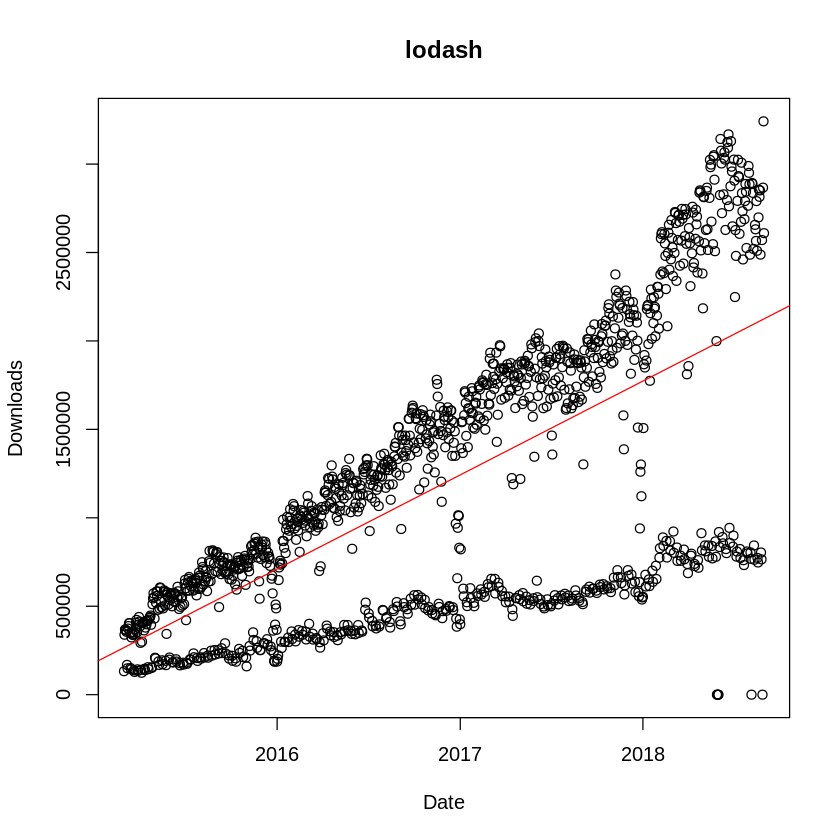

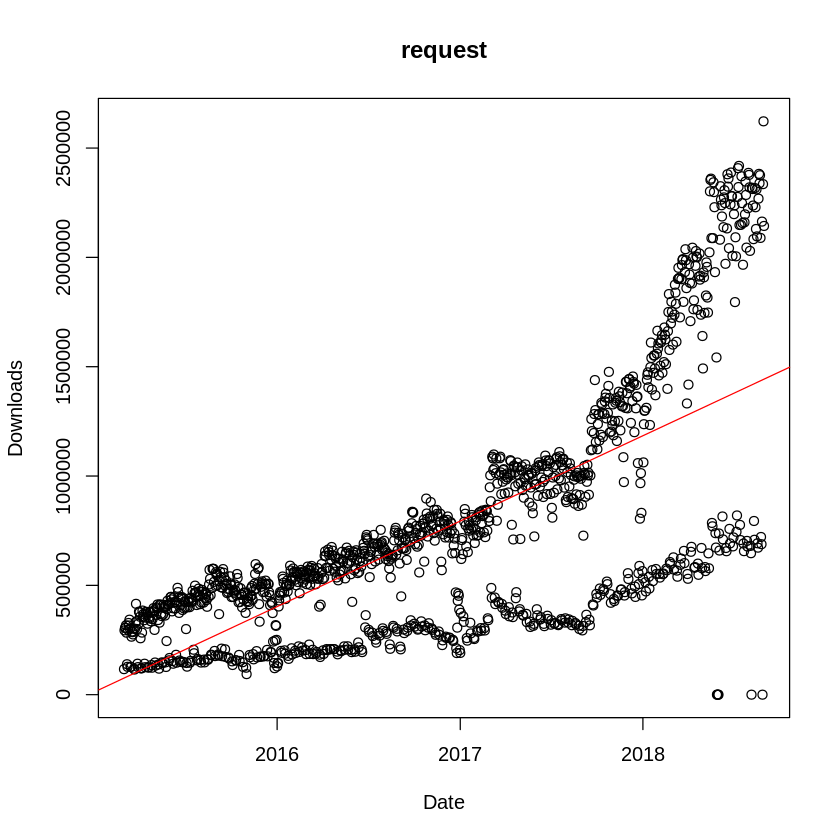

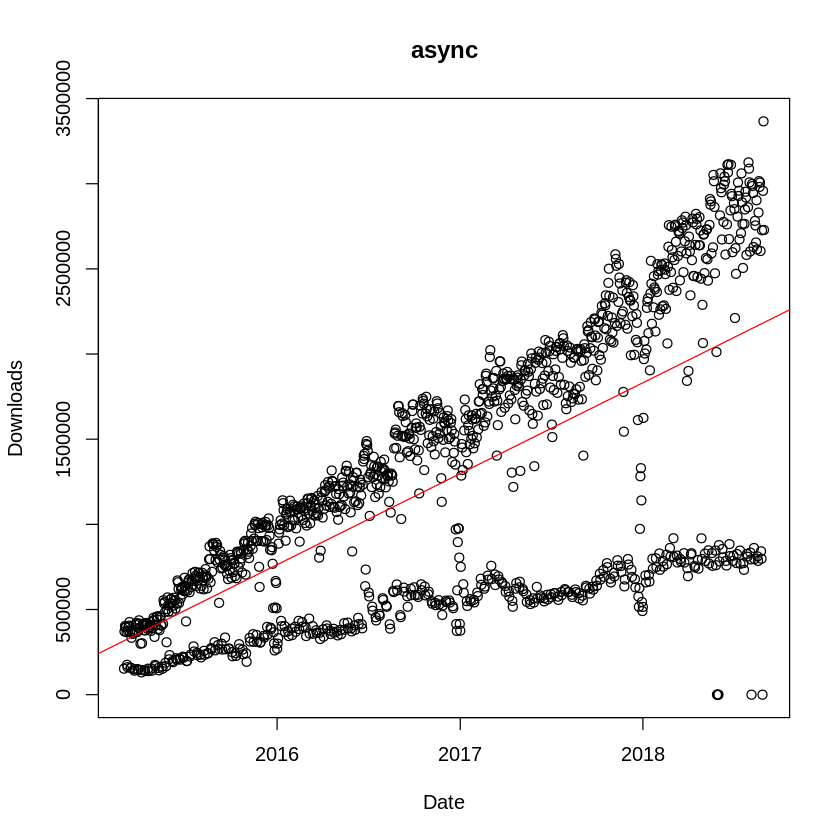

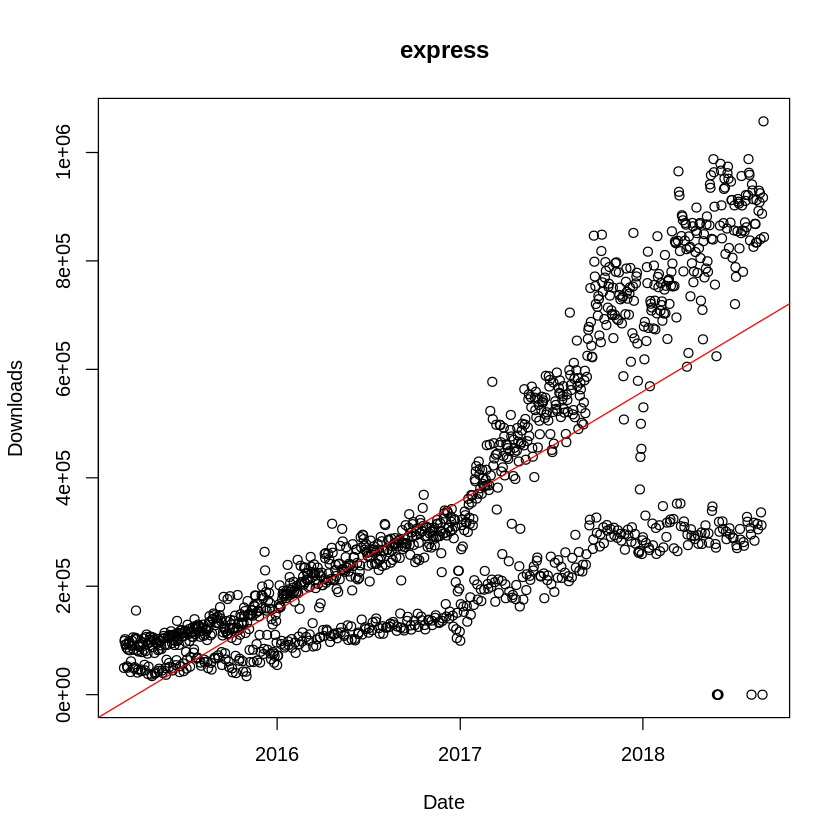

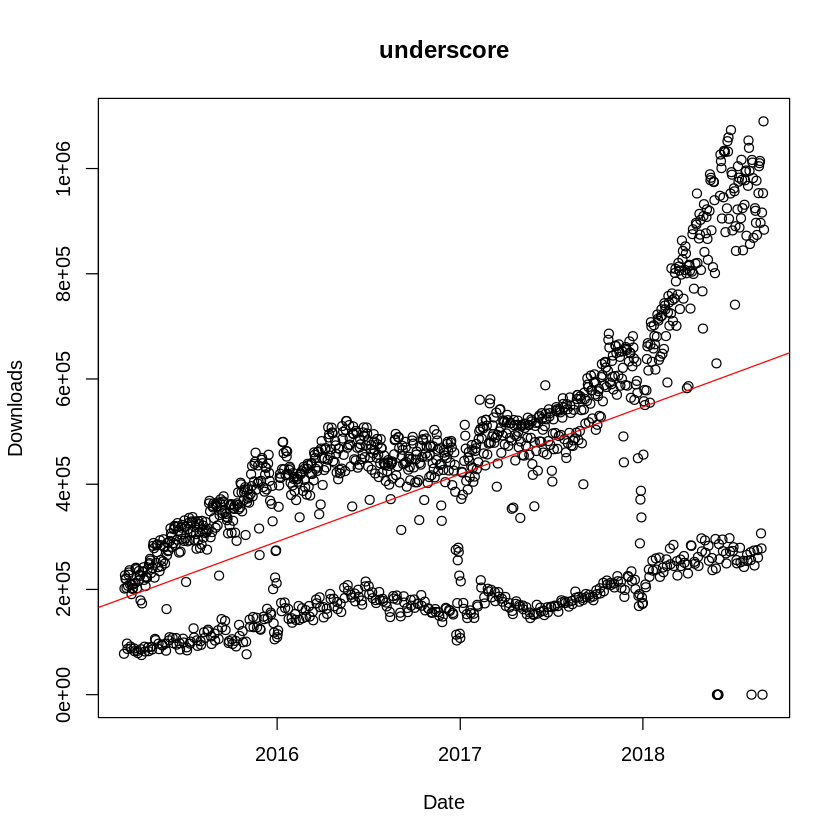

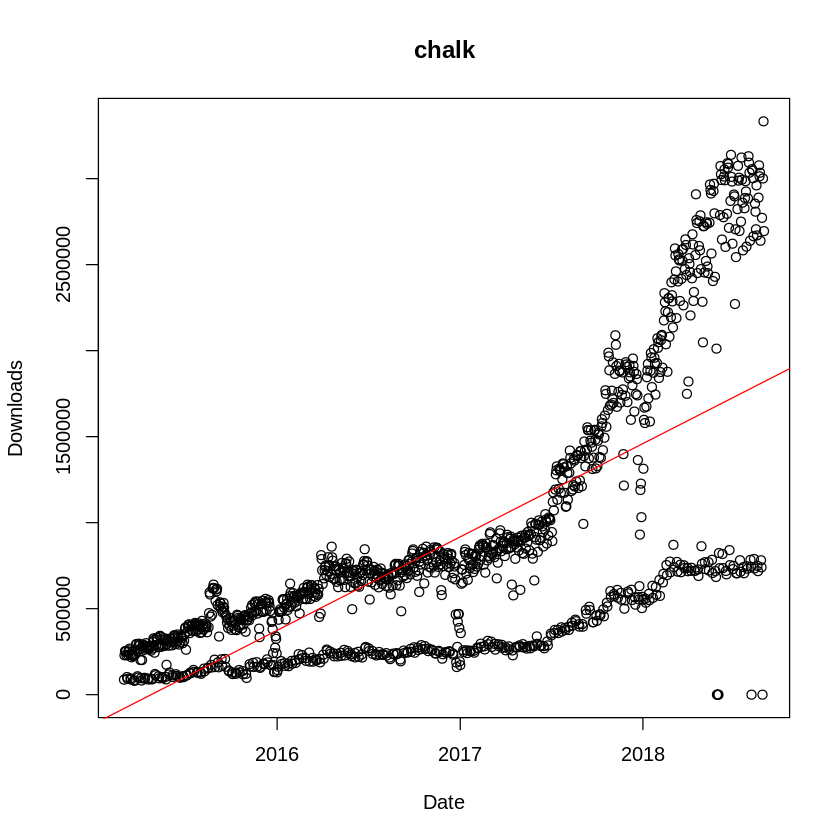

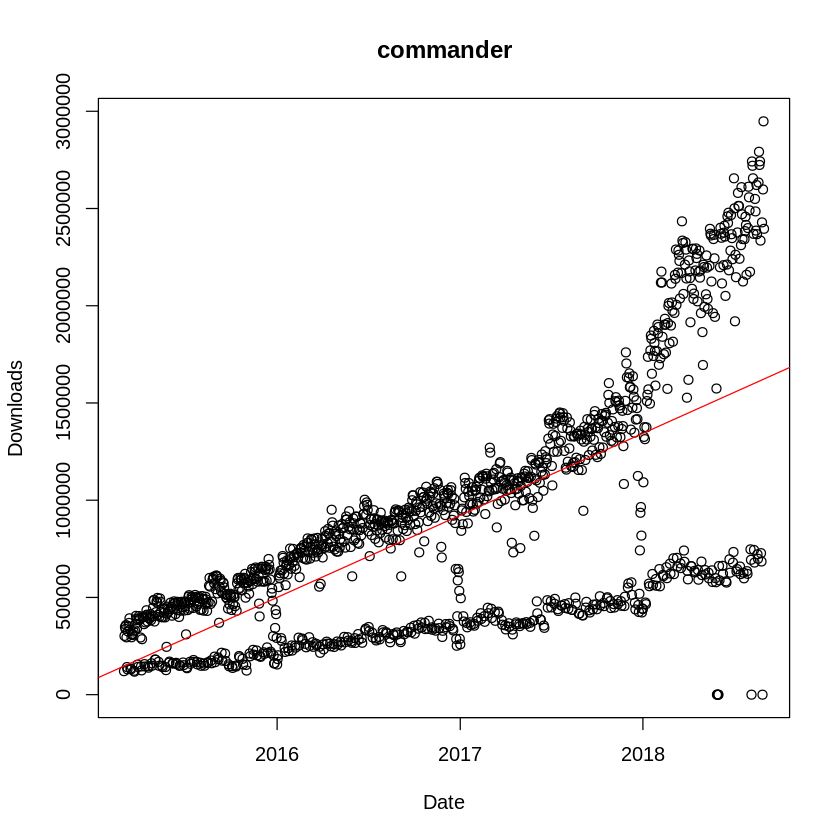

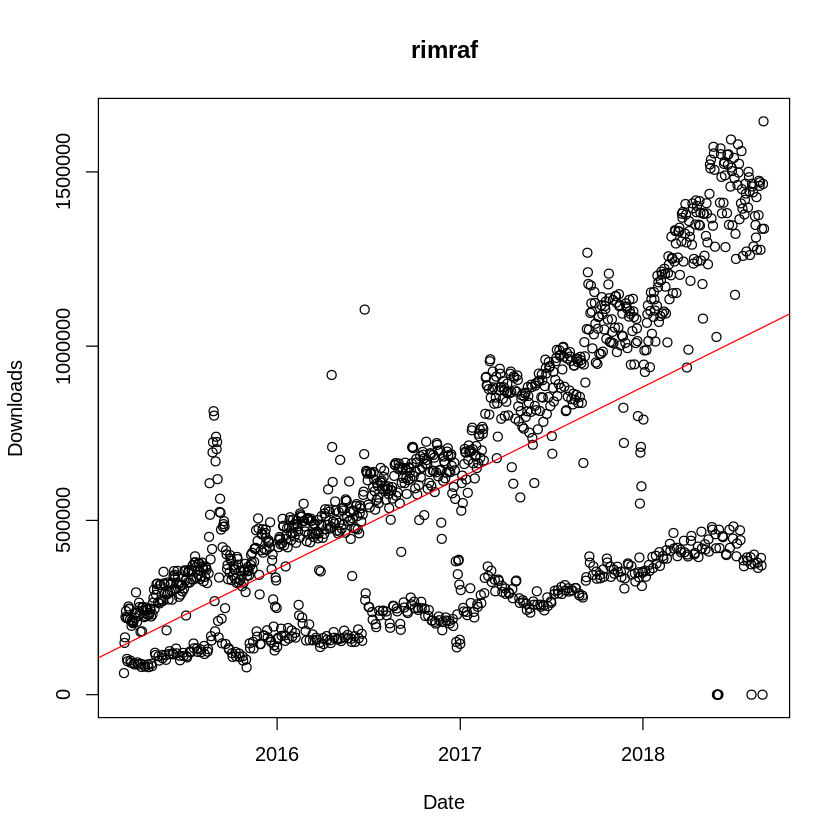

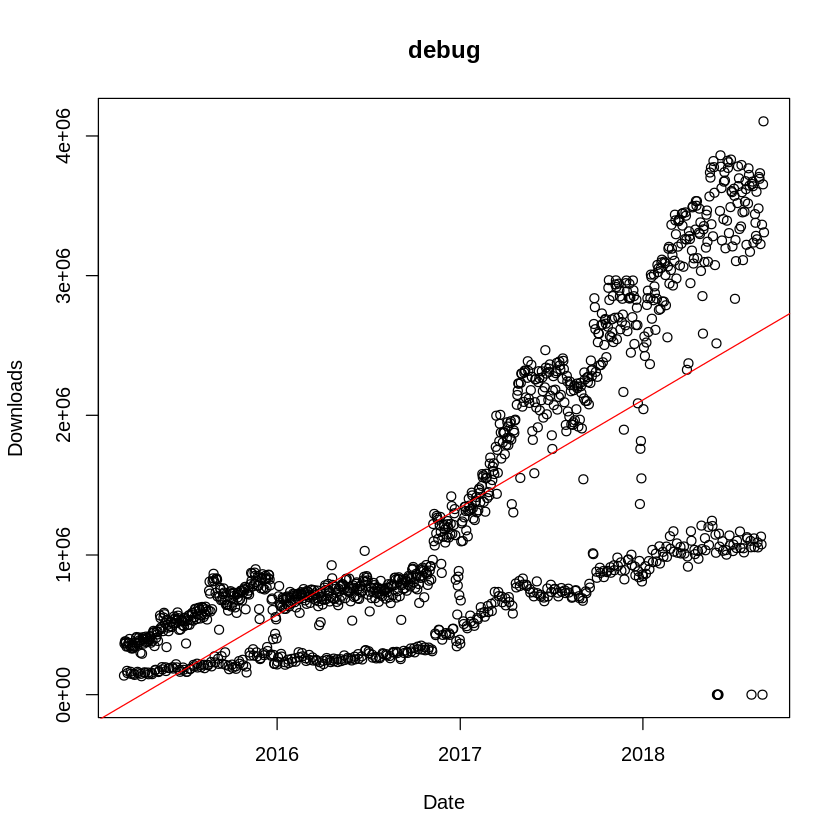

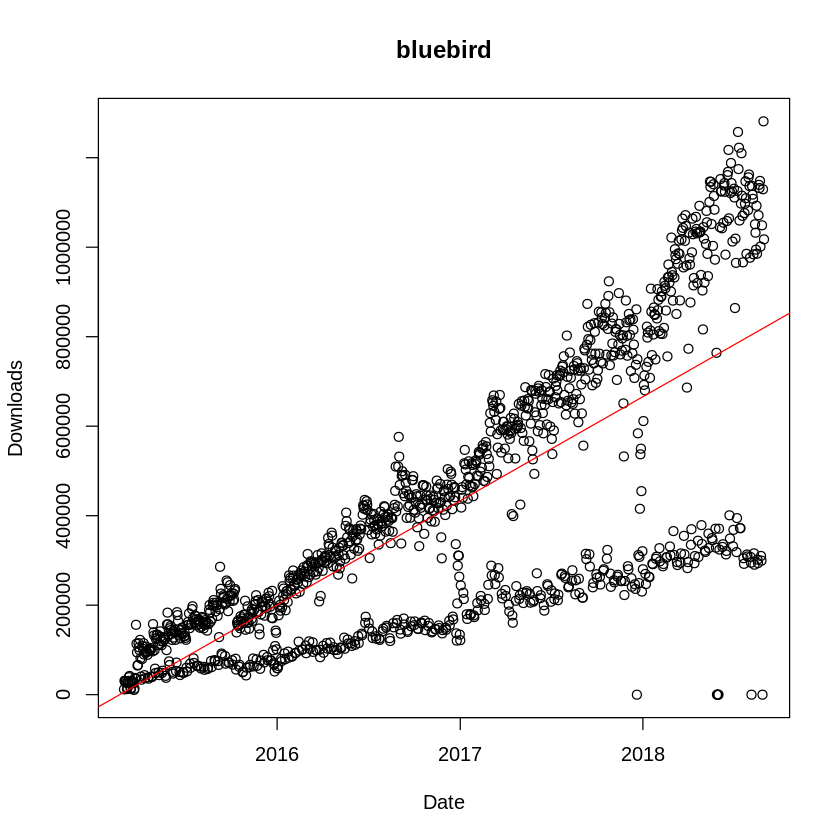

In [36]:
for (i in 1:10){
plot(dt.range, df[i,], type='p', ylab='Downloads', xlab='Date', main=pkg.name[i])
abline(lm(as.numeric(df[i,])~dt.range), col='red')
}

In [24]:
df[1,]

2015-03-01,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-07,2015-03-08,2015-03-09,2015-03-10,...,2018-08-22,2018-08-23,2018-08-24,2018-08-25,2018-08-26,2018-08-27,2018-08-28,2018-08-29,2018-08-30,2018-08-31
132468,338983,368665,365980,364661,355242,168357,149096,373837,387890,...,2814869,2851030,2488094,803870,764990,2570151,0,2866764,3241680,2609307


In [37]:
wkday = weekdays(dt.range)

In [48]:
library(ggplot2)
library(plyr)


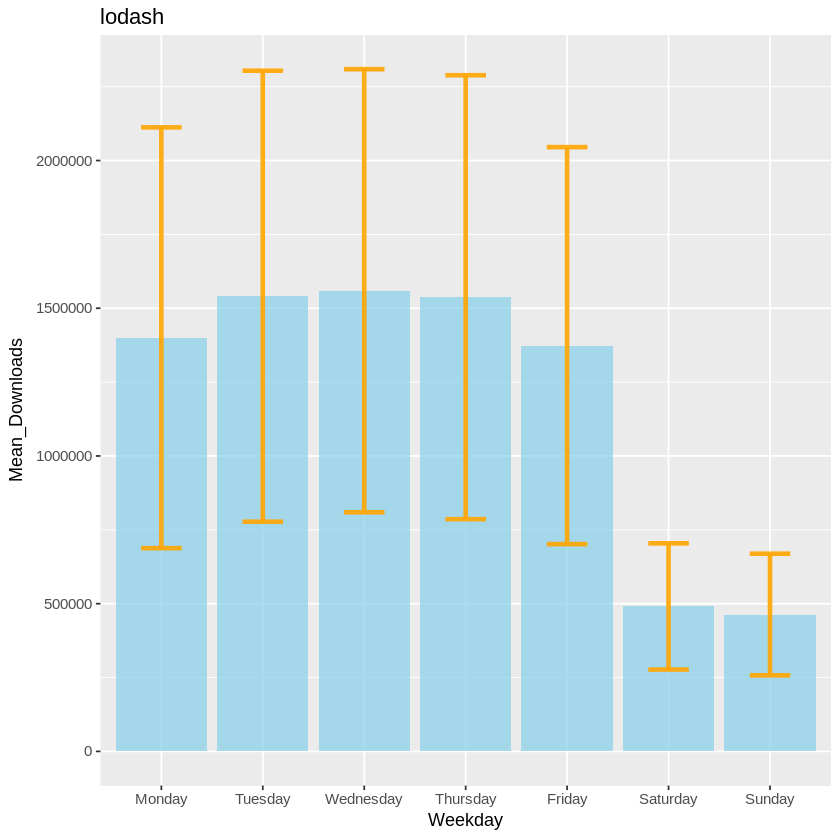

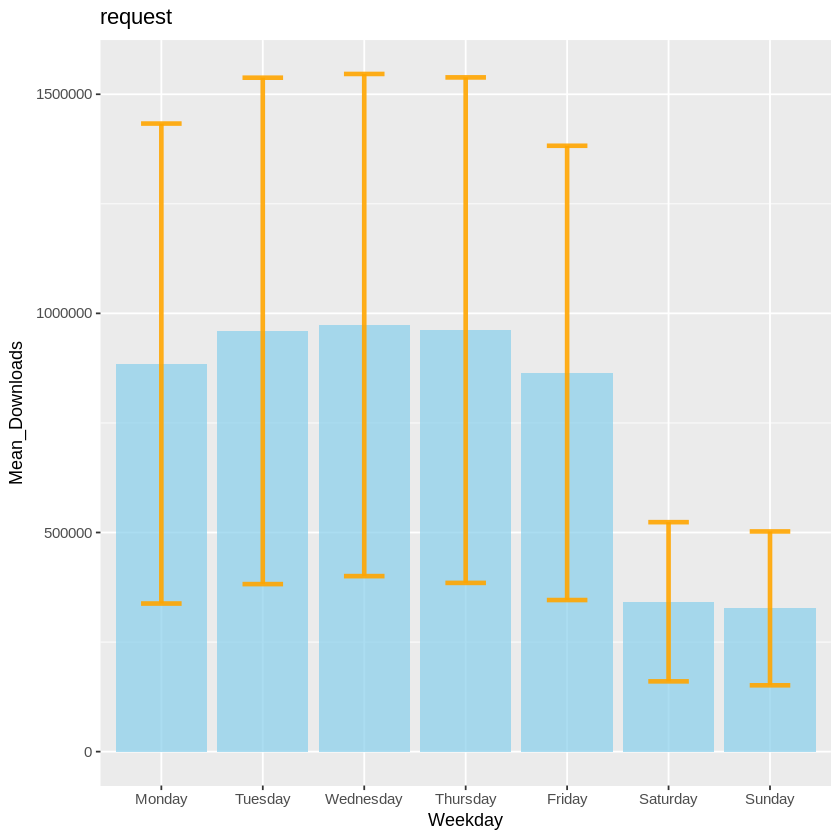

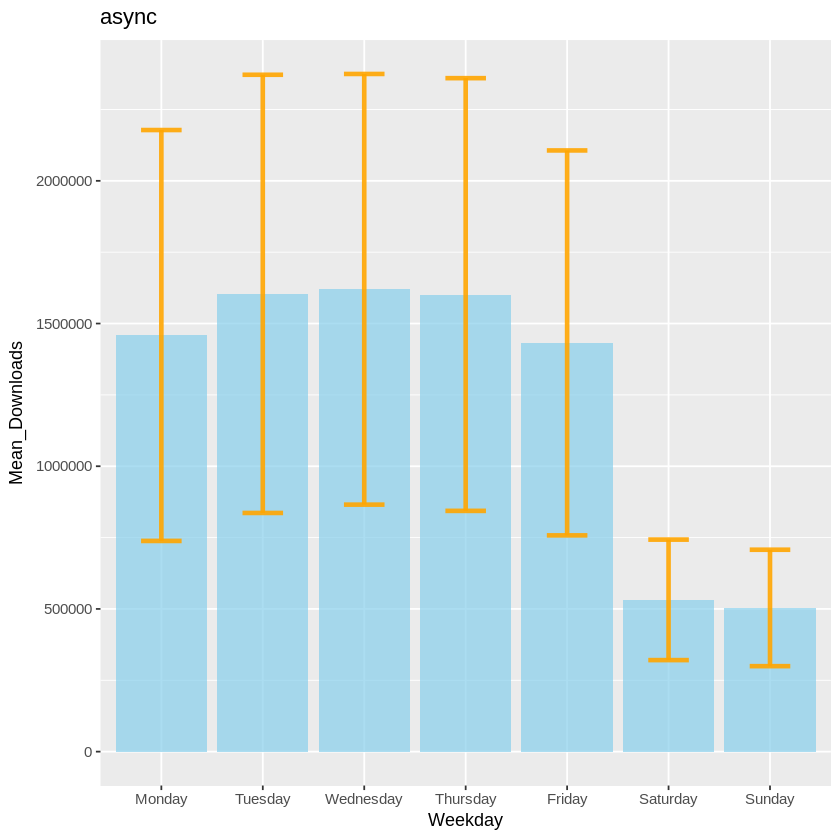

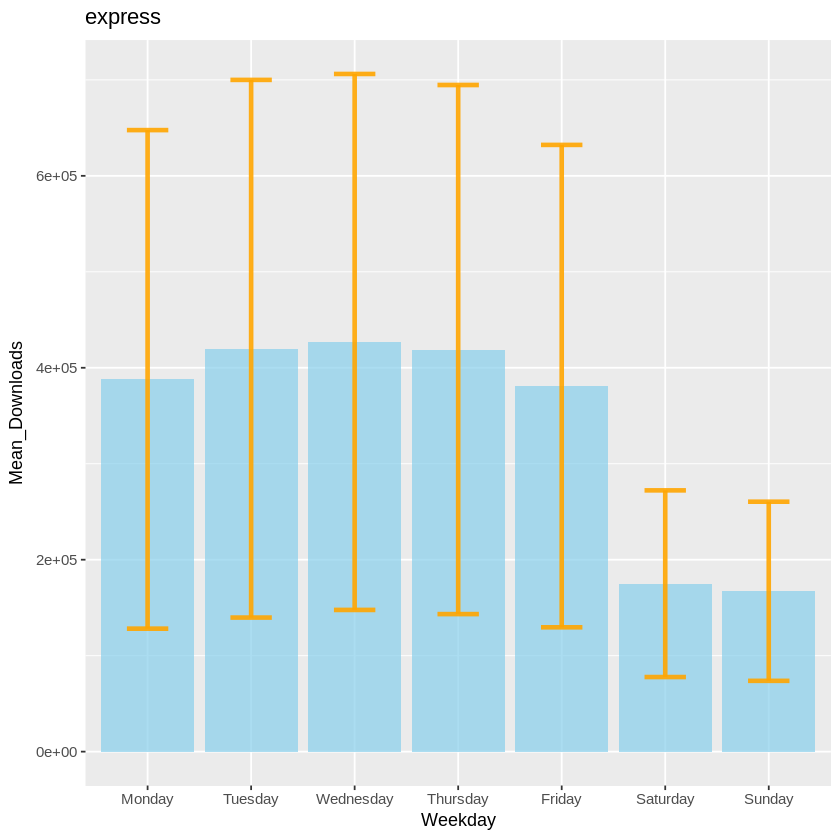

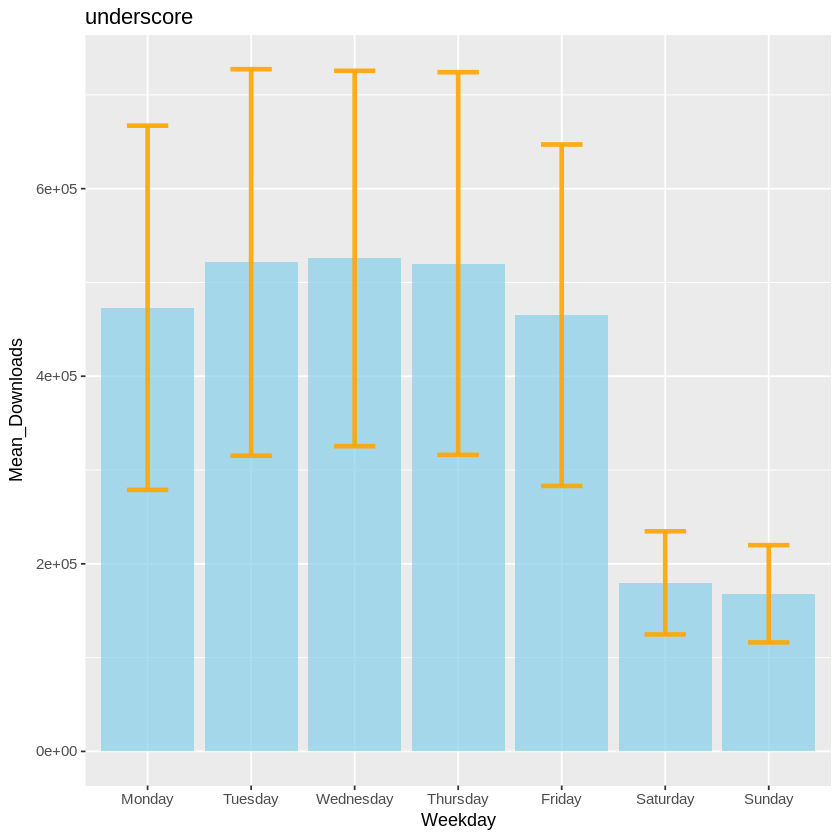

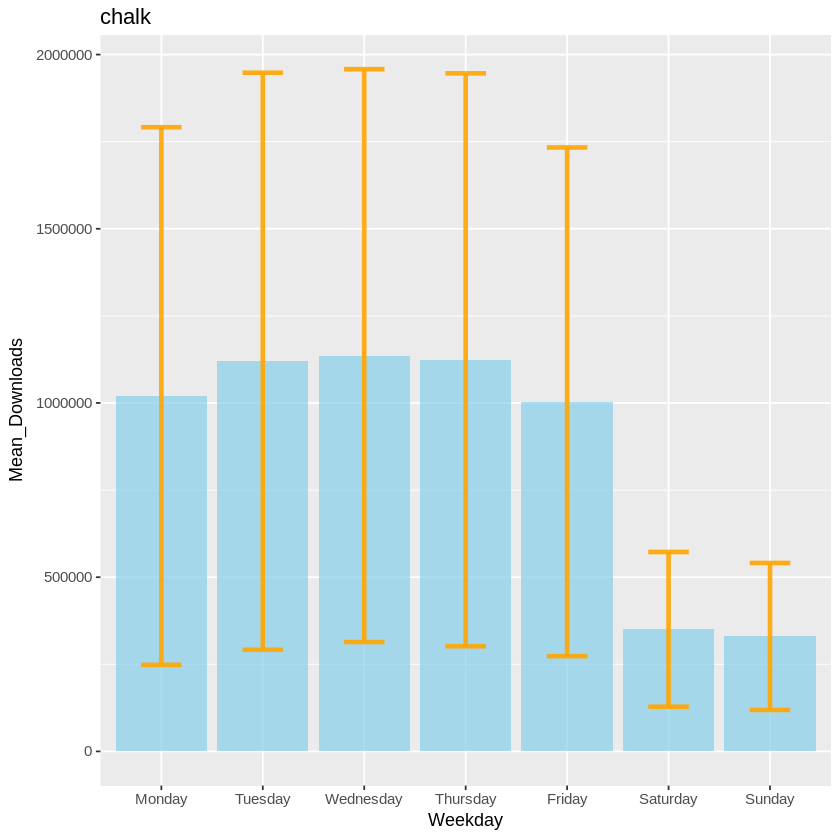

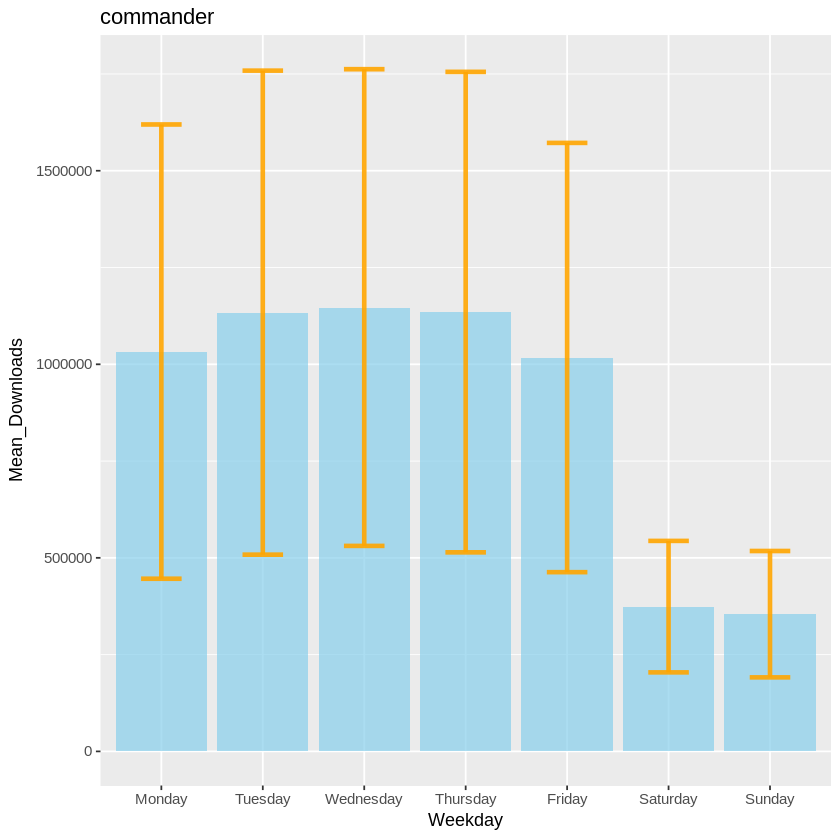

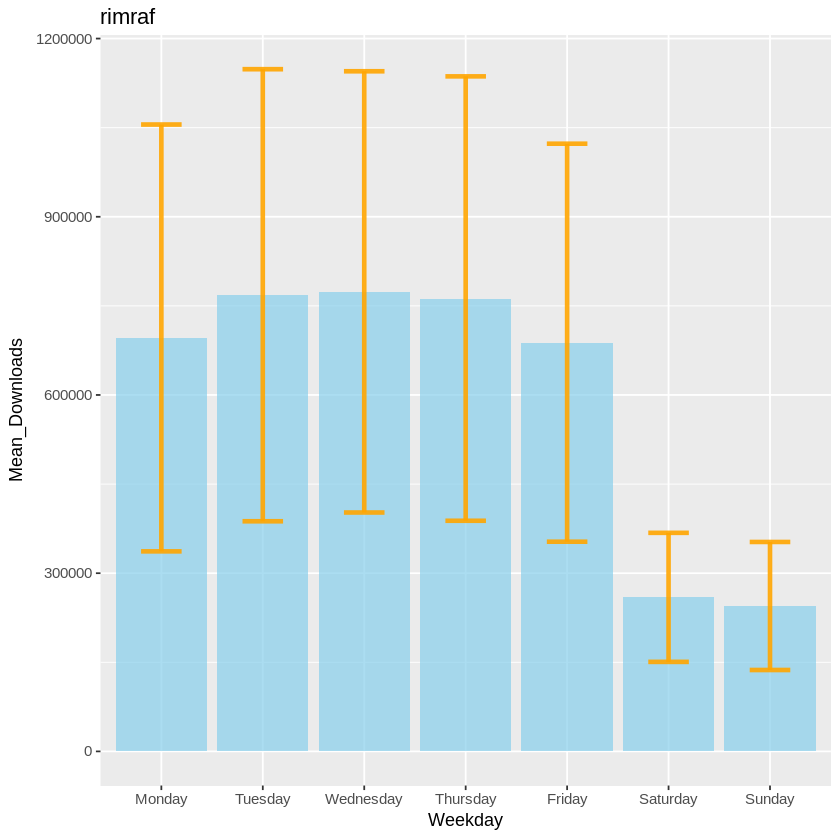

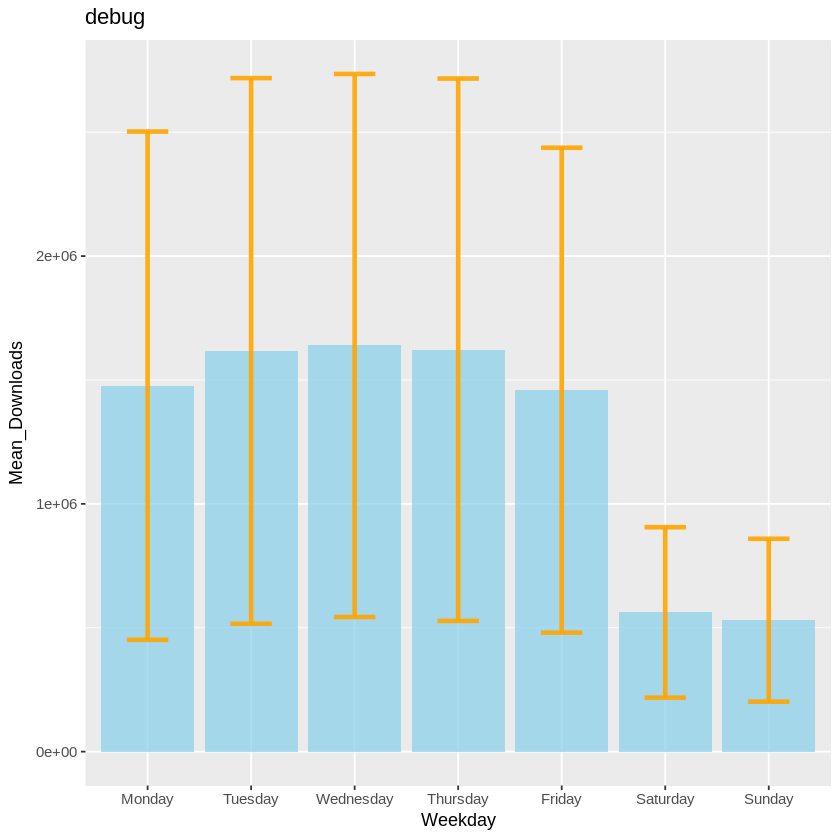

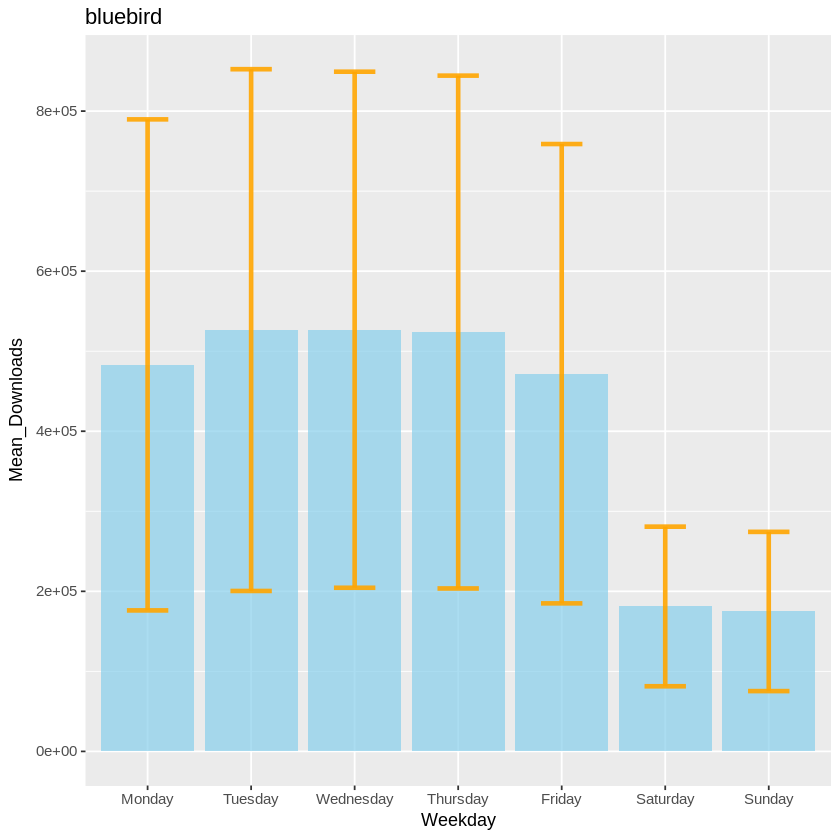

In [70]:
for (i in 1:10){

dum = data.frame("Weekday" = wkday, "Downloads" = as.numeric(df[i,]))
#str(dum)
dum2 = ddply(dum, .(Weekday), summarise,
            mean_dl = mean(Downloads),
            sd_dl = sd(Downloads))
dum2$Weekday <- factor(dum2$Weekday, levels = levels(dum2$Weekday)[c(2,6,7,5,1,3,4)])

print(ggplot(dum2) + geom_bar( aes(x=Weekday, y=mean_dl), stat="identity", fill="skyblue", alpha=0.7)+
    geom_errorbar( aes(x=Weekday, ymin=mean_dl-sd_dl, ymax=mean_dl+sd_dl), width=0.4, colour="orange", alpha=0.9, size=1.3)+
ylab('Mean_Downloads') + ggtitle(pkg.name[i]))
    }